## Final Project Submission

Please fill out:
* Student name: Ian Kiptoo
* Student pace: Full time Remote
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


# 1.  Introduction
## 1.1 Overview
This project will entail using exploratory data analysis (EDA) to try and come up with useful insights that will be used by Microsoft to make informed bussiness decisions.
This is in regard to entering into a new market of origanal video production.

## 1.2 Business Understanding

Microsoft aims to gain a foothold in the film industry by launching its own film studio. However, lacking experience in film production, Microsoft sought to understand successful films to inform its strategy. By conducting exploratory data analysis (EDA), the project aims to identify key factors contributing to the films success, such as genre preferences, demographics and key responses. The insights gained will enable Microsoft to make informed decisions about the types of films to be released based on market trends and audience preferences. Ultimately, this move is intended to make Microsoft Movie Studios more competitive in the changing entertainment market.

### Key inquiries:

1.Does the total number of films produced relate to the total gross income?

2.How is rating related to movie duration?

3.Is there a relationship between the popularity of movies and the number of votes they receive on a movie rating platform?

4.What are the trends observed in the average popularity of films across different release years?

5.What are the top 10 most popular movie genres, and how do their popularity ratings compare?


## 1.3 Revieving my current working directory





In [652]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4298-8E60

 Directory of C:\Users\Ian\Documents\fraiton\dsc-data-science-env-config\dsc-phase-1-project-v2-4

03/22/2024  08:54    <DIR>          .
03/22/2024  08:54    <DIR>          ..
03/18/2024  19:27               163 .canvas
03/18/2024  19:27                84 .gitignore
03/20/2024  19:42    <DIR>          .ipynb_checkpoints
03/18/2024  19:27         1,425,341 awesome.gif
03/18/2024  19:27             1,846 CONTRIBUTING.md
03/18/2024  22:13                 0 im.db
03/22/2024  06:39    <DIR>          Images
03/18/2024  19:27             1,357 LICENSE.md
03/18/2024  19:27           107,563 movie_data_erd.jpeg
03/21/2024  16:46            22,781 README.md
03/22/2024  08:54           515,982 student.ipynb
03/20/2024  19:44             1,680 Untitled.ipynb
03/18/2024  22:20    <DIR>          zippedData
              10 File(s)      2,076,797 bytes
               5 Dir(s)  47,021,539,328 bytes free


## 1.4 Importing all the relevant Libraries

In [653]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Data Understanding and Data Analysis

## 2.1 Data understanding

### 2.1.1 Data sources

### 1.Box Office Mojo
This is an American website that provides box office data for movies. The site was founded in 1988 by Brandon Gray, and was bought in by IMDb in 2008. IMDb is itself ownwed by Amazon.
It specificy offers analysis services and tracks box office receipts both domestically and in the international level.

### 2. IMDB (Internet Movie Database)
IMDB is one of the most comprehensive database for films,television series, podcasts, home videos, video games, and streaming content online.This includes cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical reviews. It was founded in 1990, and moved to the web in 1993.

### 3. Rotten Tomatoes
Rotten Tomatoes is an American review aggregation website for film and television. It collects reviews from critics and audiences and assigns a "Tomatometer" score to movies based on the percentage of positive reviews. It also provides audience scores and reviews.

### 4. TheMovieDB
TheMovieDB (TMDB) is a user-generated database that provides information about movies, TV shows, and actors. It offers similar information to IMDB, including movie details, cast and crew information, user ratings, and more.

### 5. The Numbers
The numbers is a film industry data website that tracks box office revenue in a systematic, algorithimic way. 
The company also engagges in doing research and comes up with income forecasts of film projects.




### 2.1.2 Reading the data 

In [654]:
# Importing the files to understand contents as well

box_office_mojo_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
rotten_tomatoes_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t')
themoviedb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
the_numbers_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

### 2.1.3 Exploring the Data
Examination of the data structure and content. Understanding the data types, dimensions, and any initial patterns or insights.

### 1. Box office Mojo

In [655]:
box_office_mojo_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [656]:
box_office_mojo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [657]:
# Calculate the total number of missing values in each column
missing_values_total = box_office_mojo_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


This data has a total of 5 columns and 3387 rows.
The columns names include title, studio, domestric_gross, foreign_gross and year.
In this data set we also have missing values. Three columns contains missing values, that is
studio with 5, domestric_gross with 28 and foreign_gross with 1350.

### Data types

### title 
This column contains object data type, likely representing titles of movies or similar categorical information.
### studio
Similarly, this column also contains object data type, likely representing the studios associated with the movies.
### domestic_gross
This column contains float64 data type, indicating numerical values for domestic gross earnings of movies.
### foreign_gross
This column contains object data type, which is unexpected for representing monetary values. It might need further investigation as it should ideally be of a numeric data type.
### year
This column contains int64 data type, representing the years associated with the movies.

Will need to do further analysis inorder to deal with the missing values and the foreign_gross column that is of type object which seems not to be what we expected of monetary terms.








### 2.Rotten Tomatoes

In [658]:
rotten_tomatoes_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [659]:
rotten_tomatoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [660]:
# Calculate the total number of missing values in each column
missing_values_total = rotten_tomatoes_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


This data set contains 12 columns and 1560 rows.
The column names include id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime and studio.
In total we have 11 columns that contains missing values.
The only column that does not contain missing values is the id column.

The synopsis column has 62 missing values, the rating column has 3 missing values, the genre column has 8 missing values, the director column has 199 missing values, the writer column has 449 missing values, the theater_date column has 359 missing values, the dvd_date column has 359 missing values, the currency column has 1220 missing values, the box_office column has 1220 missing values, the runtime column has 30 missing values, and the studio column has 1066 missing values.

### Data types
### synopsis 
This column contains textual data and is represented as an object data type.

### rating 
This column represent categorical data such as movie ratings (e.g., PG, PG-13) and is represented as an object data type.
### genre
This column represent categorical data indicating the genre of movies (e.g., Action, Comedy) and could be represented as an object data type.
### director
This column contains names of movie directors and is represented as an object data type.
### writer
Similar to the director column, this column contains names of movie writers and is represented as an object data type.
### theater_date and dvd_date
These columns represent dates and is represented as datetime data types.
### currency, box_office, and runtime
These columns represent numerical data is represented as appropriate numerical data types (e.g., float64 for currency and box office, int64 for runtime).
### studio
This column represent categorical data indicating the movie studios and is represented as an object data type.

Gennerally the data types are what is expected, but on the other hand this data set contains a lot of missing values hence the need to do further analysis.

### 3. TheMovieDB

In [661]:
themoviedb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [662]:
# removing the Unnamed column
themoviedb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)

In [663]:
themoviedb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [664]:
# Calculate the total number of missing values in each column
missing_values_total = themoviedb_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


This data set contains 9 columns and 26517 rows.
The column names include genre_ids, id, original_language, originality_title, popularity, release_date, title, vote_average and vote_count.
This data set does not contain any missing values.

### Data types
### genre_ids
This column contains object data type, representing genre IDs associated with movies.
### id
This column contains int64 data type, representing unique identifiers for movies.
### original_language
This column contains object data type, indicating the original language of movies.
### original_title
This column contains object data type, representing the original titles of movies.
### popularity
This column contains float64 data type, representing popularity scores of movies.
### release_date
This column contains object data type, representing release dates of movies. It will be convinent to convert it to datetime data type for further analysis.
### title
This column contains object data type, representing the titles of movies.
### vote_average
This column contains float64 data type, representing average ratings of movies.
### vote_count
This column contains int64 data type, representing the number of votes cast for movies.


This data set does not have major issues and will be convient to use it to do further analysis.

### 4.The Numbers

In [665]:
the_numbers_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [666]:
the_numbers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [667]:
# Calculate the total number of missing values in each column
missing_values_total = the_numbers_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


This data set contains 6 columns and 5782 rows.
The column names include id, release_date, movie, production_budget, domestic_gross and worlwide_gross.
Also this data does not contain any missing values.

### Data types
### id 
This column contains int64 data type, representing unique identifiers for movies.
### release_date
This column contains object data type, representing release dates of movies. Will convert it to datetime data type for further analysis.
### movie
This column contains object data type, representing the titles of movies.
### production_budget
This column contains object data type, which is unexpected for representing monetary values. It might need further investigation as it should ideally be of a numeric data type.
### domestic_gross 
This column contains object data type, which is unexpected for representing monetary values
Will need to carry out further investigation as it should ideally be of a numeric data type.
### worldwide_gross
This column contains object data type, which is unexpected for representing monetary values. It might need further investigation as it should ideally be of a numeric data type.

This data requires further analysis inorder to determine the column types.

# 2.2 Data Preparation and Analysis

Should be able to deal with missing values and data types issues and do the necessary analysis.

### 1. Box Office Mojo

In [668]:
# Getting the shape of the data
box_office_mojo_df.shape

(3387, 5)

In [669]:
# Getting frequency of unique values
box_office_mojo_df.value_counts()

title                           studio   domestic_gross  foreign_gross  year
xXx: The Return of Xander Cage  Par.     44900000.0      301200000      2017    1
I Am Number Four                BV       55100000.0      94800000       2011    1
How to Be Single                WB (NL)  46800000.0      65500000       2016    1
How to Train Your Dragon        P/DW     217600000.0     277300000      2010    1
How to Train Your Dragon 2      Fox      177000000.0     444500000      2014    1
                                                                               ..
Source Code                     Sum.     54700000.0      92600000       2011    1
South of the Border             CLS      199000.0        70800          2010    1
Southpaw                        Wein.    52400000.0      39500000       2015    1
Southside with You              RAtt.    6300000.0       208000         2016    1
'71                             RAtt.    1300000.0       355000         2015    1
Length: 2007, dtype: 

In [670]:
# Changing the data type of foreign_gross from str to int
box_office_mojo_df['foreign_gross'] = box_office_mojo_df['foreign_gross'].str.replace(',', '')
box_office_mojo_df['foreign_gross'] = pd.to_numeric(box_office_mojo_df['foreign_gross'])
box_office_mojo_df['foreign_gross'].head()

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [671]:
# Dealing with missing values
missing_values_total = box_office_mojo_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [672]:
# Dealing with missing studio values
missing_studio_rows = box_office_mojo_df[box_office_mojo_df["studio"].isna()]
missing_studio_rows

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000.0,2010
555,Fireflies in the Garden,NaN,70600.0,3300000.0,2011
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000.0,2017


Sice the rows are few and we cannot just replace a studio with the mode or the mean value of the data, since we do not actually know the name the best practice is to drop the missing values. Thi will ensure that the quality of the data remains intact.

In [673]:
# Missing values in the domestic_gross 
missing_domestic_rows = box_office_mojo_df[box_office_mojo_df["domestic_gross"].isna()]
missing_domestic_rows

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000.0,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000.0,2010
302,White Lion,Scre.,NaN,99600.0,2010
306,Badmaash Company,Yash,NaN,64400.0,2010
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010
537,Force,FoxS,NaN,4800000.0,2011
713,Empire of Silver,NeoC,NaN,19000.0,2011
871,Solomon Kane,RTWC,NaN,19600000.0,2012
928,The Tall Man,Imag.,NaN,5200000.0,2012
933,Keith Lemon: The Film,NaN,NaN,4000000.0,2012


In [674]:
# Missing values in the foreign_gross
missing_foreign_rows = box_office_mojo_df[box_office_mojo_df["foreign_gross"].isna()]
missing_foreign_rows

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [675]:
## Remove null values from columns
box_office_mojo_df.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
box_office_mojo_df.shape

(2007, 5)

In [676]:
# Checking that there are no null values
box_office_mojo_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### Do the movie production and revenue relate?

In [677]:
# finding studios with most production and the one with least production
studio_counts = box_office_mojo_df["studio"].value_counts()
print(studio_counts.head())
print(studio_counts.tail())

Uni.    144
Fox     134
WB      130
Sony    105
BV      104
Name: studio, dtype: int64
Neon    1
Outs    1
DR      1
HC      1
IW      1
Name: studio, dtype: int64


In [678]:
# Creating a column with total pay
box_office_mojo_df["total_pay"] = box_office_mojo_df["domestic_gross"] + box_office_mojo_df["foreign_gross"]

In [679]:
box_office_mojo_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_pay
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [680]:
# Grouping studio by total_pay
studio_total_pay = box_office_mojo_df.groupby('studio')['total_pay'].sum().sort_values(ascending=False)

print(studio_total_pay)

studio
BV              4.419038e+10
Fox             3.098037e+10
WB              3.079150e+10
Uni.            2.974681e+10
Sony            2.240472e+10
                    ...     
Darin Southa    9.840000e+04
ICir            7.960000e+04
ITL             5.290000e+04
WOW             4.940000e+04
Crnth           3.830000e+04
Name: total_pay, Length: 172, dtype: float64


In [681]:
# Comparing with the number of films produced.
# Merging studio_total_pay with studio_counts
merged_data = pd.concat([studio_total_pay, studio_counts], axis=1, keys=['Total Pay', 'Counts'])

print(merged_data.head(20))
print(merged_data.tail(10))

            Total Pay  Counts
BV       4.419038e+10     104
Fox      3.098037e+10     134
WB       3.079150e+10     130
Uni.     2.974681e+10     144
Sony     2.240472e+10     105
Par.     1.944420e+10      94
WB (NL)  1.031410e+10      44
LGF      8.467471e+09      87
LG/S     5.318924e+09      37
P/DW     5.076500e+09      10
Wein.    4.095903e+09      69
SGem     3.140162e+09      34
WGUSA    2.778054e+09      25
Focus    2.496769e+09      51
FoxS     2.474688e+09      49
Sum.     2.284971e+09      14
CL       1.898686e+09      22
Rela.    1.715417e+09      28
TriS     1.713055e+09      19
STX      1.474200e+09      22
              Total Pay  Counts
Icar.          177700.0       1
AGF            176800.0       1
NYer           128800.0       1
FOAK           124300.0       1
IVP            112100.0       1
Darin Southa    98400.0       1
ICir            79600.0       1
ITL             52900.0       1
WOW             49400.0       1
Crnth           38300.0       1


In [682]:
# Grouping the data by studio
grouped_data = box_office_mojo_df.groupby("studio")
grouped_data.head()

,title,studio,domestic_gross,foreign_gross,year,total_pay
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3258,A Private War,Aviron,1600000.0,2200000.0,2018,3.800000e+06
3268,Billionaire Boy's Club,VE,1300.0,2500000.0,2018,2.501300e+06
3271,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05


In [683]:
grouped_data.first()

,title,domestic_gross,foreign_gross,year,total_pay
studio,,,,,
3D,Sea Rex 3D: Journey to a Prehistoric World,6100000.0,9900000.0,2010,16000000.0
A24,Spring Breakers,14100000.0,17600000.0,2013,31700000.0
AF,Barbara,1000000.0,3100000.0,2012,4100000.0
AGF,Anchor Baby,15800.0,161000.0,2011,176800.0
AR,L.O.R.D: Legend of Ravaging Dynasties,350000.0,57700000.0,2016,58050000.0
...,...,...,...,...,...
WOW,GasLand,30800.0,18600.0,2010,49400.0
Wein.,The King's Speech,135500000.0,275400000.0,2010,410900000.0
Yash,Band Baaja Baaraat,43800.0,60700.0,2010,104500.0


### Visualization

In [684]:
type(merged_data)

pandas.core.frame.DataFrame

In [685]:
type(studio_counts)

pandas.core.series.Series

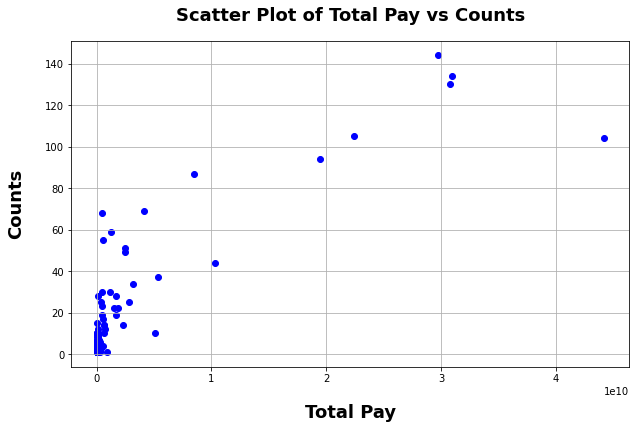

In [686]:
# Plotting scatter plot for Total Pay and Counts
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Total Pay'], merged_data['Counts'], color='blue')
plt.xlabel('Total Pay' ,fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Counts', fontsize=18, fontweight='bold', labelpad=20)
plt.title('Scatter Plot of Total Pay vs Counts', fontsize=18, fontweight='bold',pad=20)
plt.grid(True)
plt.show()

In [687]:
# Correlation
# Calculate the correlation coefficient between 'Total Pay' and 'Counts'
correlation_coefficient = merged_data['Total Pay'].corr(merged_data['Counts'])
correlation_coefficient


0.8623473337335764

### Observation and Insights:
With a correlation coefficient of 0.86234, there is a high degree of linear dependency between total pay and the number of films produced by the studios. This insight implies that changes in one variable will likely result in predictable changes in the other variable. This implies that with increased production there will be an increase in the total revenue.

However, it's essential to note that correlation does not imply causation. While a correlation coefficient of 0.86234 indicates a strong association between the variables, it does not necessarily mean that one variable causes the other to change. There may be other underlying factors or variables influencing the observed relationship.

Therefore, while a positive correlation of 0.86234 provides valuable insights into the relationship between the variables, further analysis and experimentation may be required to establish causality and make informed decisions.


### 2.Rotten Tomatoes

For this data I will be interested in answering the relation between different genre of movies and revene.
Will like to know if there are specific profitable genres of movies.

In [688]:
# Getting the shape of the data
rotten_tomatoes_df.shape

(1560, 12)

In [689]:
# Dealing with missing values
missing_values_total = rotten_tomatoes_df.isnull().sum()

# Display the total number of missing values
print("Total missing values in each column:")
print(missing_values_total)

Total missing values in each column:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [690]:
rotten_tomatoes_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


### Interested in the rating and runtime columns

In [691]:
rotten_tomatoes_df["runtime"]

0       104 minutes
1       108 minutes
2       116 minutes
3       128 minutes
4       200 minutes
           ...     
1555    106 minutes
1556     88 minutes
1557    111 minutes
1558    101 minutes
1559     94 minutes
Name: runtime, Length: 1560, dtype: object

In [692]:
rotten_tomatoes_df["rating"]

0        R
1        R
2        R
3        R
4       NR
        ..
1555     R
1556    PG
1557     G
1558    PG
1559     R
Name: rating, Length: 1560, dtype: object

In [693]:
# getting the null values for the genre
rotten_tomatoes_df["runtime"].isnull().sum()

30

In [694]:
# getting the null values for the box_office
rotten_tomatoes_df["rating"].isnull().sum()

3

In [695]:
# obtaining random sample of the values in the box_office
random_samples = rotten_tomatoes_df.sample(5) 
random_samples

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
646,830,A gay New Yorker stages a marriage of convenie...,R,Art House and International|Comedy|Drama|Roman...,Ang Lee,Ang Lee|James Schamus|Neil Peng,"Aug 4, 1993","Jun 15, 2004",NaN,NaN,111 minutes,NaN
16,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,"99,165,609",129 minutes,Sony Pictures
787,1017,David Fincher's The Curious Case of Benjamin B...,PG-13,Drama|Science Fiction and Fantasy|Romance,David Fincher,Eric Roth|Robin Swicord,"Dec 25, 2008","May 5, 2009",$,"127,490,802",166 minutes,Paramount
733,941,A woman who has just discovered she is the dau...,R,Action and Adventure|Comedy,Martyn Burke,Will Aldis,"Jan 1, 2002","May 20, 2003",NaN,NaN,98 minutes,NaN
146,191,Award-winning filmmaker Rakeysh Omprakash Mehr...,NR,Drama,Rakeysh Omprakash Mehra|Rakeysh Omprakesh Mehra,Prasoon Joshi,"Jul 12, 2013","Jan 12, 2015",$,"1,626,289",188 minutes,Reliance Entertainment


In [696]:
# Dropping the missing values
rotten_tomatoes_df.dropna(subset=['rating', 'runtime'], inplace=True)
rotten_tomatoes_df.shape


(1530, 12)

In [697]:
rotten_tomatoes_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [698]:
unique_ratings = rotten_tomatoes_df["rating"].value_counts()
unique_ratings

R        519
NR       482
PG       239
PG-13    232
G         57
NC17       1
Name: rating, dtype: int64

In [699]:
# Extract numerical part in runtime and convert to numeric
rotten_tomatoes_df['runtime'] = rotten_tomatoes_df['runtime'].str.extract('(\d+)').astype(float)

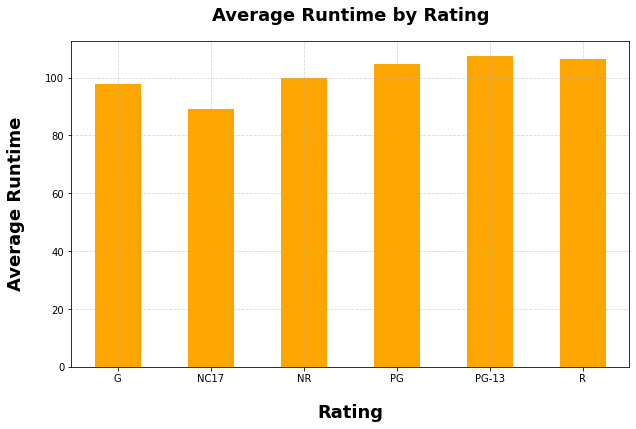

In [700]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
rotten_tomatoes_df.groupby('rating')['runtime'].mean().plot(kind='bar', color='orange')
plt.title('Average Runtime by Rating', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Rating', fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Average Runtime', fontsize=18, fontweight='bold', labelpad=20)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


From the bar plot, pG-13 has the highest of the avearage runtime while NC17 has the lowest.

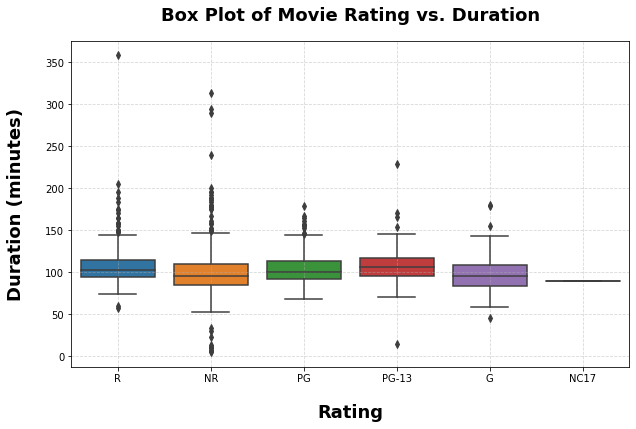

In [701]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='runtime', data=rotten_tomatoes_df)
plt.title('Box Plot of Movie Rating vs. Duration', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Rating',fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Duration (minutes)',fontsize=18, fontweight='bold', labelpad=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

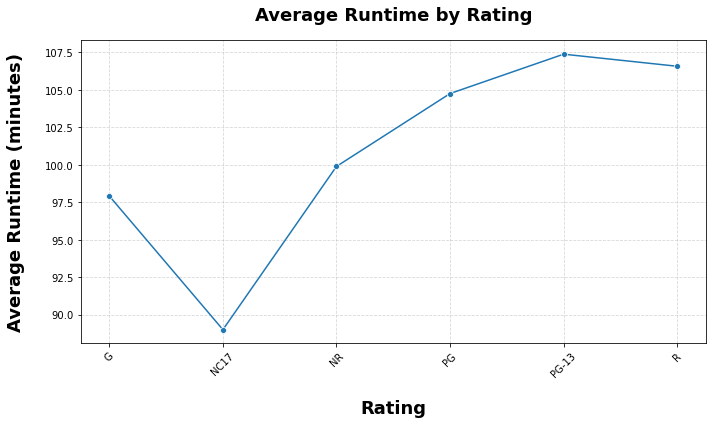

In [702]:
# Grouping data by 'rating' and calculating the average 'runtime'
average_runtimes = rotten_tomatoes_df.groupby('rating')['runtime'].mean().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_runtimes, x='rating', y='runtime', marker='o', linestyle='-')
plt.title('Average Runtime by Rating', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Rating', fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Average Runtime (minutes)', fontsize=18, fontweight='bold', labelpad=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Observation and Insights:
The insights gained from the three plots—bar, box, and line—offer invaluable guidance for Microsoft in aligning movie content with audience preferences. The bar plot, depicting average runtimes for each movie rating category, aids in understanding audience expectations, enabling Microsoft to curate diverse content offerings that resonate with viewers. Similarly, the distribution of movie runtimes across rating categories, as illustrated in the box plot, provides insights into audience preferences, including the identification of outliers. By analyzing these outliers, Microsoft can refine its content curation strategies to ensure that its platforms offer a diverse range of content that appeals to a broad audience. Integrating these insights into Microsoft's platforms can enhance user experiences by providing personalized content recommendations that cater to individual preferences. Furthermore, analyzing the trend between movie ratings and durations, as depicted in the line plot, allows Microsoft to tailor its content offerings to specific target audiences, ensuring alignment with diverse viewer preferences. By incorporating these insights into its platforms, Microsoft can improve content curation and user satisfaction, solidifying its position in the entertainment industry.

### 3. The MovieDB

In [703]:
# Getting the shape of the data
themoviedb_df.shape

(26517, 9)

In [704]:
themoviedb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [705]:
# Getting data description
themoviedb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [706]:
# Checking out the missing values
themoviedb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [707]:
type(themoviedb_df["id"])

pandas.core.series.Series

In [708]:
# Check for duplicate rows based on the 'id' column
duplicate_rows_id = themoviedb_df[themoviedb_df.duplicated(subset='id')]

# Display duplicate rows based on 'id' column
print("Duplicate Rows Based on 'id':")
print(duplicate_rows_id)


Duplicate Rows Based on 'id':
                    genre_ids      id original_language  \
2473          [16, 35, 10751]     862                en   
2477          [16, 35, 10751]     863                en   
2536            [12, 28, 878]   20526                en   
2673              [18, 10749]   46705                en   
2717   [35, 18, 14, 27, 9648]   45649                en   
...                       ...     ...               ...   
26481                [35, 18]  270805                en   
26485                [27, 53]  453259                en   
26504            [27, 35, 27]  534282                en   
26510                    [99]  495045                en   
26511                    [99]  492837                en   

               original_title  popularity release_date  \
2473                Toy Story      28.005   1995-11-22   
2477              Toy Story 2      22.698   1999-11-24   
2536             TRON: Legacy      13.459   2010-12-10   
2673           Blue Valentine

In [709]:
# Drop duplicate rows based on the 'id' column
themoviedb_df.drop_duplicates(subset='id', inplace=True)

# Display the DataFrame after dropping duplicates
print(themoviedb_df)


                 genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3      

This data set is complete and does not contain any missing values.
From the earlier analysis on data types, it does not contain any incositencies hence the data is ready for further analysis.

From this data will like to discover if there is a relation between popularity, release date, original language, vote count and vote average.

In [710]:
#Extracting the popularity data
popularity_data = themoviedb_df["popularity"]
popularity_data.head()

0    33.533
1    28.734
2    28.515
3    28.005
4    27.920
Name: popularity, dtype: float64

In [711]:
# Extracting release date data
release_data = themoviedb_df["release_date"]
release_data.head(10)

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
5    2010-02-11
6    2009-12-18
7    2010-06-17
8    2010-07-09
9    2010-11-04
Name: release_date, dtype: object

In [712]:
# Getting value counts for unique values
unique_date = release_data.value_counts()
unique_date

2010-01-01    268
2011-01-01    199
2012-01-01    155
2014-01-01    152
2013-01-01    145
             ... 
1967-12-21      1
1988-06-03      1
2017-12-06      1
2009-12-04      1
2011-05-23      1
Name: release_date, Length: 3433, dtype: int64

In [713]:
# Finding correlation 
numerical_columns = ['popularity', 'vote_count', 'vote_average']

# Compute correlation matrix
correlation_matrix = themoviedb_df[numerical_columns].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              popularity  vote_count  vote_average
popularity      1.000000    0.685285      0.057178
vote_count      0.685285    1.000000      0.079160
vote_average    0.057178    0.079160      1.000000


The correlation coefficients suggest that while there is some relationship between popularity and vote count, there is little to no relationship between popularity/vote count and vote average. Further analysis and visualization may be needed to explore these relationships in more detail.

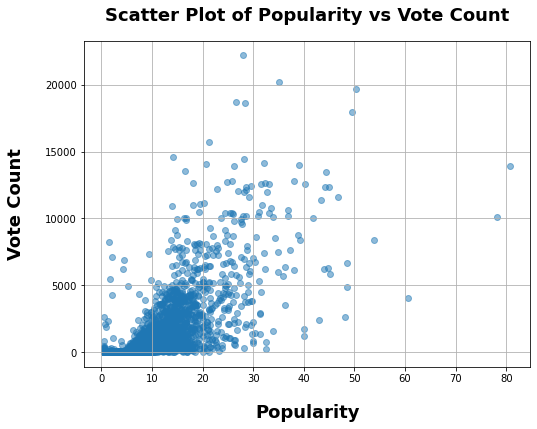

In [714]:

x = themoviedb_df['popularity']
y = themoviedb_df['vote_count']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # Set alpha to adjust transparency
plt.title('Scatter Plot of Popularity vs Vote Count',fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Popularity',fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Vote Count',fontsize=18, fontweight='bold', labelpad=20)
plt.grid(True)
plt.show()

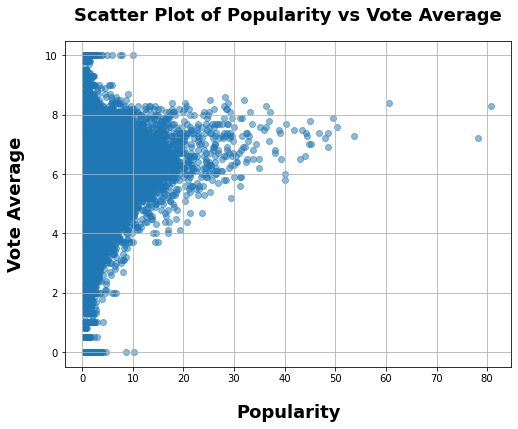

In [715]:
# You can specify the variables you want to plot on the x and y axes
x = themoviedb_df['popularity']
y = themoviedb_df['vote_average']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # Set alpha to adjust transparency
plt.title('Scatter Plot of Popularity vs Vote Average',fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Popularity',fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Vote Average',fontsize=18, fontweight='bold', labelpad=20)
plt.grid(True)
plt.show()

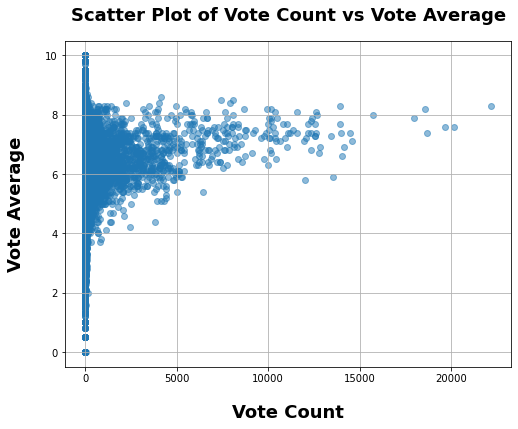

In [716]:
x = themoviedb_df['vote_count']
y = themoviedb_df['vote_average']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # Set alpha to adjust transparency
plt.title('Scatter Plot of Vote Count vs Vote Average',fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Vote Count',fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Vote Average',fontsize=18, fontweight='bold',labelpad=20)
plt.grid(True)
plt.show()

The scatter plots suggest a discernible connection between popularity and vote count, implying that as popularity increases, so does the number of votes. This correlation indicates that higher levels of popularity tend to attract more votes, reflecting a relationship between the two variables within the data.

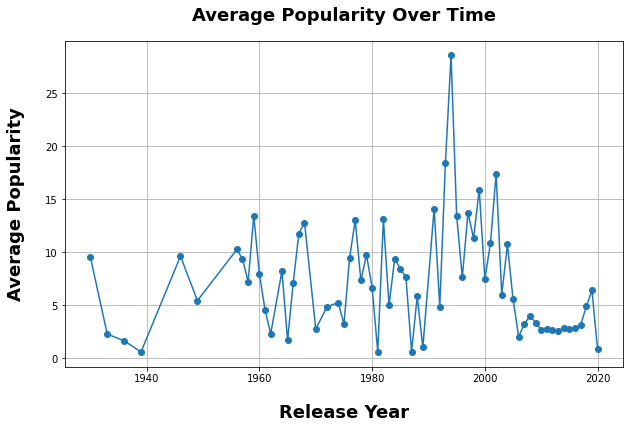

In [717]:
# Plotting average popularity overtime
# Convert release_date to datetime format if it's not already
themoviedb_df['release_date'] = pd.to_datetime(themoviedb_df['release_date'])

# Group the data by release year
grouped_data = themoviedb_df.groupby(themoviedb_df['release_date'].dt.year)

# Compute the average popularity for each release year
avg_popularity = grouped_data['popularity'].mean()

# Plot the trend of popularity over time
plt.figure(figsize=(10, 6))
plt.plot(avg_popularity.index, avg_popularity.values, marker='o', linestyle='-')
plt.title('Average Popularity Over Time',fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Release Year',fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Average Popularity',fontsize=18, fontweight='bold', labelpad=20)
plt.grid(True)
plt.show()

The plotted graph illustrates a fluctuating pattern, revealing the evolution of average popularity across various years of film releases. As the timeline progresses, the trend of average popularity demonstrates both peaks and troughs, suggesting dynamic shifts in audience interest over time. This visual representation provides insights into the changing landscape of popularity within the film industry across different release years.

In [718]:
# Sort the DataFrame by 'popularity' column in descending order and select the top 10 rows
top_10_movies = themoviedb_df.sort_values(by='popularity', ascending=False).head(10)

# Display the top 10 movies
print(top_10_movies)

                     genre_ids      id original_language  \
23811             [12, 28, 14]  299536                en   
11019                 [28, 53]  245891                en   
23812    [28, 12, 16, 878, 35]  324857                en   
11020             [28, 12, 14]  122917                en   
5179             [878, 28, 12]   24428                en   
11021            [28, 878, 12]  118340                en   
20617            [878, 28, 53]  335984                en   
23814                     [12]  338952                en   
23815  [10751, 16, 35, 14, 12]  404368                en   
20618        [28, 12, 878, 18]  315635                en   

                                    original_title  popularity release_date  \
23811                       Avengers: Infinity War      80.773   2018-04-27   
11019                                    John Wick      78.123   2014-10-24   
23812            Spider-Man: Into the Spider-Verse      60.534   2018-12-14   
11020    The Hobbit: Th

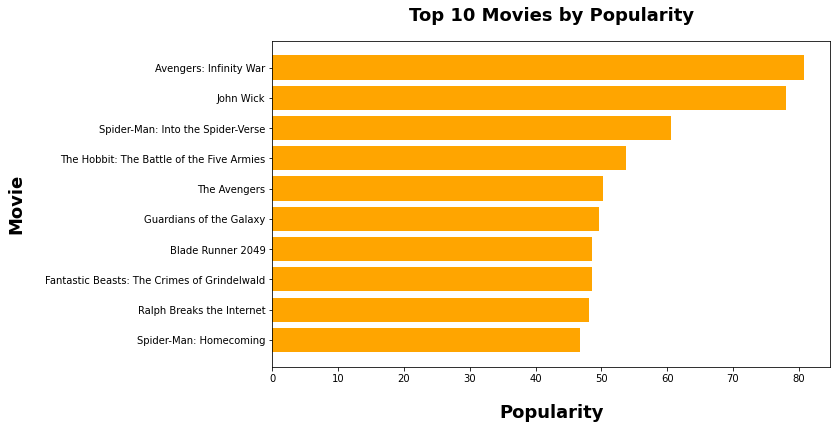

In [719]:
# Plotting the top 10 movies
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies['title'], top_10_movies['popularity'], color='orange')
plt.xlabel('Popularity', fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('Movie', fontsize=18, fontweight='bold', labelpad=20)
plt.title('Top 10 Movies by Popularity', fontsize=18, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest popularity at the top
plt.show()

In [720]:
# Define a dictionary mapping genre IDs to genre names
genre_mapping = {
    (12,): "Adventure",
    (14,): "Fantasy",
    (16,): "Animated",
    (18,): "Drama",
    (27,): "Horror",
    (28,): "Action",
    (35,): "Comedy",
    (36,): "History",
    (37,): "Western",
    (53,): "Thriller",
    (80,): "Crime",
    (878,): "Sci-fi",
    (10751,): "Family"
}

# Convert genre_ids to tuples and replace genre IDs with genre names in the "genre_ids" column
top_10_movies["genre_ids"] = top_10_movies["genre_ids"].apply(lambda x: tuple(map(int, x.strip("[]").split(", "))))
top_10_movies["genre_ids"] = top_10_movies["genre_ids"].apply(lambda x: tuple(genre_mapping.get(id, id) for id in x))

# Display the DataFrame after replacing genre IDs with genre names
print(top_10_movies)


                     genre_ids      id original_language  \
23811             (12, 28, 14)  299536                en   
11019                 (28, 53)  245891                en   
23812    (28, 12, 16, 878, 35)  324857                en   
11020             (28, 12, 14)  122917                en   
5179             (878, 28, 12)   24428                en   
11021            (28, 878, 12)  118340                en   
20617            (878, 28, 53)  335984                en   
23814                    (12,)  338952                en   
23815  (10751, 16, 35, 14, 12)  404368                en   
20618        (28, 12, 878, 18)  315635                en   

                                    original_title  popularity release_date  \
23811                       Avengers: Infinity War      80.773   2018-04-27   
11019                                    John Wick      78.123   2014-10-24   
23812            Spider-Man: Into the Spider-Verse      60.534   2018-12-14   
11020    The Hobbit: Th

In [723]:
# Replace genre IDs with genre names in the "genre_ids" column
top_10_movies["genre_ids"] = top_10_movies["genre_ids"].apply(lambda x: tuple(genre_mapping.get(id, id) for id in x))

# Display the DataFrame after replacing genre IDs with genre names
print(top_10_movies)


                                            genre_ids      id  \
23811                    (Adventure, Action, Fantasy)  299536   
11019                              (Action, Thriller)  245891   
23812   (Action, Adventure, Animated, Sci-fi, Comedy)  324857   
11020                    (Action, Adventure, Fantasy)  122917   
5179                      (Sci-fi, Action, Adventure)   24428   
11021                     (Action, Sci-fi, Adventure)  118340   
20617                      (Sci-fi, Action, Thriller)  335984   
23814                                    (Adventure,)  338952   
23815  (Family, Animated, Comedy, Fantasy, Adventure)  404368   
20618              (Action, Adventure, Sci-fi, Drama)  315635   

      original_language                               original_title  \
23811                en                       Avengers: Infinity War   
11019                en                                    John Wick   
23812                en            Spider-Man: Into the Spider-Verse

In [724]:
# Convert tuples to lists in the 'genre_ids' column
top_10_movies['genre_ids'] = top_10_movies['genre_ids'].apply(list)

# Extracting the first genre name from the 'genre_ids' column
top_10_movies['genre_title'] = top_10_movies['genre_ids'].apply(lambda x: x[0])

# Displaying the DataFrame to verify the changes
print(top_10_movies)


                                            genre_ids      id  \
23811                    [Adventure, Action, Fantasy]  299536   
11019                              [Action, Thriller]  245891   
23812   [Action, Adventure, Animated, Sci-fi, Comedy]  324857   
11020                    [Action, Adventure, Fantasy]  122917   
5179                      [Sci-fi, Action, Adventure]   24428   
11021                     [Action, Sci-fi, Adventure]  118340   
20617                      [Sci-fi, Action, Thriller]  335984   
23814                                     [Adventure]  338952   
23815  [Family, Animated, Comedy, Fantasy, Adventure]  404368   
20618              [Action, Adventure, Sci-fi, Drama]  315635   

      original_language                               original_title  \
23811                en                       Avengers: Infinity War   
11019                en                                    John Wick   
23812                en            Spider-Man: Into the Spider-Verse

In [728]:
top_10_movies["genre_title"].value_counts()

Action       5
Sci-fi       2
Adventure    2
Family       1
Name: genre_title, dtype: int64

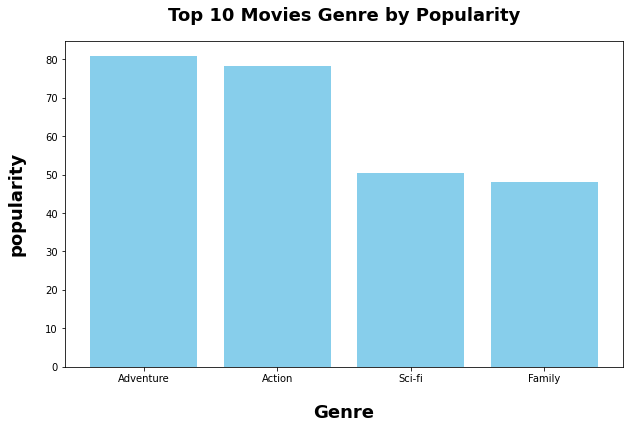

In [730]:
# Plotting the top 10 genres by popularity
plt.figure(figsize=(10, 6))
plt.bar(top_10_movies['genre_title'], top_10_movies['popularity'], color='skyblue')
plt.xlabel('Genre', fontsize=18, fontweight='bold', labelpad=20)
plt.ylabel('popularity', fontsize=18, fontweight='bold', labelpad=20)
plt.title('Top 10 Movies Genre by Popularity', fontsize=18, fontweight='bold', pad=20)
plt.show()

### Observation and Insights:

Through my analysis, it becomes evident that certain genres exert a significant influence within the film industry.

Genres such as "Action," "Family," "Sci-fi," and "Adventure" consistently demonstrate considerable popularity and widespread appeal. These genres captivate audiences with their compelling narratives, immersive experiences, and memorable characters.